In [57]:
import pandas as pd
import sqlite3
import seaborn as sns
from nltk import sent_tokenize
# from pysummarization.nlpbase.auto_abstractor import AutoAbstractor
# from pysummarization.tokenizabledoc.simple_tokenizer import SimpleTokenizer
# from pysummarization.abstractabledoc.top_n_rank_abstractor import TopNRankAbstractor

In [65]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
db = 'all-the-news.db'

In [4]:
cnx = sqlite3.connect(db)

In [5]:
df = pd.read_sql_query("SELECT * FROM longform", cnx)

In [6]:
df.head()

,id,title,author,date,content,year,month,publication,category,digital,section,url
0,1,Agent Cooper in Twin Peaks is the audience: on...,\nTasha Robinson\n,2017-05-31,And never more so than in Showtime’s new...,2017,5,Verge,Longform,1.0,None,None
1,2,"AI, the humanity!",\nSam Byford\n,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,2017,5,Verge,Longform,1.0,None,None
2,3,The Viral Machine,\nKaitlyn Tiffany\n,2017-05-25,Super Deluxe built a weird internet empi...,2017,5,Verge,Longform,1.0,None,None
3,4,How Anker is beating Apple and Samsung at thei...,\nNick Statt\n,2017-05-22,Steven Yang quit his job at Google in th...,2017,5,Verge,Longform,1.0,None,None
4,5,Tour Black Panther’s reimagined homeland with ...,\nKwame Opam\n,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,2017,5,Verge,Longform,1.0,None,None


In [7]:
df.shape

(204135, 12)

In [8]:
df.author = df.author.str.strip('\n')
# df.author = df.author.str.strip('<strong>')
# df.author = df.author.str.strip('</strong>')

In [9]:
df.head()

,id,title,author,date,content,year,month,publication,category,digital,section,url
0,1,Agent Cooper in Twin Peaks is the audience: on...,Tasha Robinson,2017-05-31,And never more so than in Showtime’s new...,2017,5,Verge,Longform,1.0,None,None
1,2,"AI, the humanity!",Sam Byford,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,2017,5,Verge,Longform,1.0,None,None
2,3,The Viral Machine,Kaitlyn Tiffany,2017-05-25,Super Deluxe built a weird internet empi...,2017,5,Verge,Longform,1.0,None,None
3,4,How Anker is beating Apple and Samsung at thei...,Nick Statt,2017-05-22,Steven Yang quit his job at Google in th...,2017,5,Verge,Longform,1.0,None,None
4,5,Tour Black Panther’s reimagined homeland with ...,Kwame Opam,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,2017,5,Verge,Longform,1.0,None,None


In [9]:
df = df[['title', 'author', 'content', 'year', 'month', 'category']]

In [10]:
df.isnull().sum()

title           0
author      32135
content     12954
year        12603
month       12603
category    35422
dtype: int64

In [11]:
#drop all rows where there is no article text
df.dropna(subset=['content'], inplace = True)

In [12]:
df.shape

(191181, 6)

In [13]:
df.isnull().sum()

title           0
author      20502
content         0
year         5518
month        5518
category    27703
dtype: int64

In [14]:
df.groupby('category').title.count()

category
Book Reviews       20
Exclusive         214
Longform          137
Reports           854
broadcast       18672
business         8344
general         52152
newspaper       60365
radio           12001
wire            10719
Name: title, dtype: int64

In [15]:
df['len_article'] = df.content.str.len()

In [16]:
df = df[(df.len_article >= 2500) & (df.len_article <= 15000)]

In [17]:
df.head()

,title,author,content,year,month,category,len_article
0,Agent Cooper in Twin Peaks is the audience: on...,Tasha Robinson,And never more so than in Showtime’s new...,2017,5,Longform,12219
1,"AI, the humanity!",Sam Byford,AlphaGo’s victory isn’t a defeat for hum...,2017,5,Longform,11068
6,Massive attack,Colin Lecher,How a weapon against war became a weapon...,2017,4,Longform,14088
9,Brain drain,Casey Newton,Genius quietly laid off a bunch of its e...,2017,3,Longform,12170
32,Facebook takes flight,Casey Newton,Inside the test flight of Facebook’s fir...,2016,7,Longform,11967


In [18]:
df.shape

(128946, 7)

In [19]:
df.head()

,title,author,content,year,month,category,len_article
0,Agent Cooper in Twin Peaks is the audience: on...,Tasha Robinson,And never more so than in Showtime’s new...,2017,5,Longform,12219
1,"AI, the humanity!",Sam Byford,AlphaGo’s victory isn’t a defeat for hum...,2017,5,Longform,11068
6,Massive attack,Colin Lecher,How a weapon against war became a weapon...,2017,4,Longform,14088
9,Brain drain,Casey Newton,Genius quietly laid off a bunch of its e...,2017,3,Longform,12170
32,Facebook takes flight,Casey Newton,Inside the test flight of Facebook’s fir...,2016,7,Longform,11967


In [20]:
df.content[0].count('. ')

77

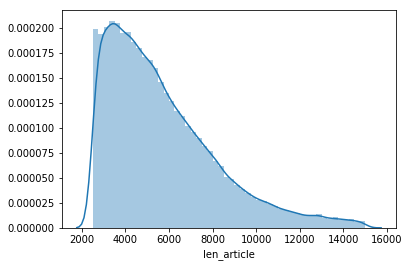

In [21]:
sns.distplot(df.len_article)

In [22]:
print('mean:', df.len_article.mean())
print('std:', df.len_article.std())
print('max:', df.len_article.max())
print('min:', df.len_article.min())

mean: 5688.714516154049
std: 2519.6824599005054
max: 14999
min: 2500


[Text(0, 0, 'Longform'),
 Text(0, 0, 'Reports'),
 Text(0, 0, 'Exclusive'),
 Text(0, 0, 'Book Reviews'),
 Text(0, 0, 'newspaper'),
 Text(0, 0, 'general'),
 Text(0, 0, 'broadcast'),
 Text(0, 0, 'business'),
 Text(0, 0, 'radio'),
 Text(0, 0, 'wire')]

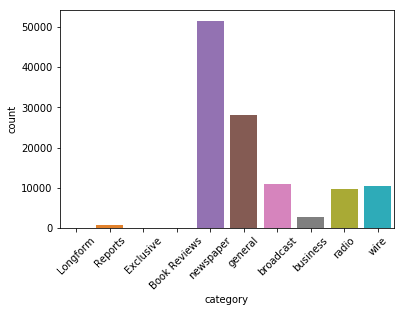

In [23]:
ax = sns.countplot(x= 'category', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [24]:
from gensim.summarization.summarizer import summarize

In [25]:
def gensim_summarizer(x, ratio_):
    try:
        return summarize(x, ratio = ratio_)
    except:
        return ''

In [26]:
test_df = df.iloc[:10]

In [27]:
test_df

,title,author,content,year,month,category,len_article
0,Agent Cooper in Twin Peaks is the audience: on...,Tasha Robinson,And never more so than in Showtime’s new...,2017,5,Longform,12219
1,"AI, the humanity!",Sam Byford,AlphaGo’s victory isn’t a defeat for hum...,2017,5,Longform,11068
6,Massive attack,Colin Lecher,How a weapon against war became a weapon...,2017,4,Longform,14088
9,Brain drain,Casey Newton,Genius quietly laid off a bunch of its e...,2017,3,Longform,12170
32,Facebook takes flight,Casey Newton,Inside the test flight of Facebook’s fir...,2016,7,Longform,11967
38,E-Waste Empire,Andrew J . Hawkins,Gadget shopping? Chances are that as soo...,2016,6,Longform,13762
39,Xbox: Start to Continue,Andrew Webster,It was a rare sunny day in Seattle and P...,2016,6,Longform,14440
80,On set with Arnold: Can Schwarzenegger bring b...,Jacob Kastrenakes,Terminator ResurrectedOn set with A...,2015,3,Longform,12690
81,Can we cure the common hangover?,Elizabeth Lopatto,We start with shots of Jameson at 9:45PM...,2015,3,Longform,13445
84,Surrounded by sound: how 3D audio hacks your b...,Mona Lalwani,"On a crisp afternoon late last year, I made ...",2015,2,Longform,13336


In [29]:
test_df['gensim_summary'] = test_df.content.apply(lambda x : gensim_summarizer(x, ratio_ = .05))

/Users/austinkrause/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
test_df

,title,author,content,year,month,category,len_article,gensim_summary
0,Agent Cooper in Twin Peaks is the audience: on...,Tasha Robinson,And never more so than in Showtime’s new...,2017,5,Longform,12219,"In the second season finale, back in 1991, the..."
1,"AI, the humanity!",Sam Byford,AlphaGo’s victory isn’t a defeat for hum...,2017,5,Longform,11068,When speaking to DeepMind and Google developer...
6,Massive attack,Colin Lecher,How a weapon against war became a weapon...,2017,4,Longform,14088,International visitors for the event are commo...
9,Brain drain,Casey Newton,Genius quietly laid off a bunch of its e...,2017,3,Longform,12170,"In a post on the Genius blog at the time, co-f..."
32,Facebook takes flight,Casey Newton,Inside the test flight of Facebook’s fir...,2016,7,Longform,11967,But if your goal is to stay in the air for a l...
38,E-Waste Empire,Andrew J . Hawkins,Gadget shopping? Chances are that as soo...,2016,6,Longform,13762,"In the US, we threw away 16 billion pounds of ..."
39,Xbox: Start to Continue,Andrew Webster,It was a rare sunny day in Seattle and P...,2016,6,Longform,14440,"Microsoft’s approach starts with hardware, whe..."
80,On set with Arnold: Can Schwarzenegger bring b...,Jacob Kastrenakes,Terminator ResurrectedOn set with A...,2015,3,Longform,12690,"It all looks strange, but then you begin to se..."
81,Can we cure the common hangover?,Elizabeth Lopatto,We start with shots of Jameson at 9:45PM...,2015,3,Longform,13445,Even though about three-quarters of people who...
84,Surrounded by sound: how 3D audio hacks your b...,Mona Lalwani,"On a crisp afternoon late last year, I made ...",2015,2,Longform,13336,"You’ll hear a whisper in one ear.""""It puts you..."


In [39]:
df['gensim_summary'] = df.content.apply(lambda x : gensim_summarizer(x, ratio_ = .05))

In [41]:
df.head(100)

,title,author,content,year,month,category,len_article,gensim_summary
0,Agent Cooper in Twin Peaks is the audience: on...,Tasha Robinson,And never more so than in Showtime’s new...,2017,5,Longform,12219,"In the second season finale, back in 1991, the..."
1,"AI, the humanity!",Sam Byford,AlphaGo’s victory isn’t a defeat for hum...,2017,5,Longform,11068,When speaking to DeepMind and Google developer...
6,Massive attack,Colin Lecher,How a weapon against war became a weapon...,2017,4,Longform,14088,International visitors for the event are commo...
9,Brain drain,Casey Newton,Genius quietly laid off a bunch of its e...,2017,3,Longform,12170,"In a post on the Genius blog at the time, co-f..."
32,Facebook takes flight,Casey Newton,Inside the test flight of Facebook’s fir...,2016,7,Longform,11967,But if your goal is to stay in the air for a l...
38,E-Waste Empire,Andrew J . Hawkins,Gadget shopping? Chances are that as soo...,2016,6,Longform,13762,"In the US, we threw away 16 billion pounds of ..."
39,Xbox: Start to Continue,Andrew Webster,It was a rare sunny day in Seattle and P...,2016,6,Longform,14440,"Microsoft’s approach starts with hardware, whe..."
80,On set with Arnold: Can Schwarzenegger bring b...,Jacob Kastrenakes,Terminator ResurrectedOn set with A...,2015,3,Longform,12690,"It all looks strange, but then you begin to se..."
81,Can we cure the common hangover?,Elizabeth Lopatto,We start with shots of Jameson at 9:45PM...,2015,3,Longform,13445,Even though about three-quarters of people who...
84,Surrounded by sound: how 3D audio hacks your b...,Mona Lalwani,"On a crisp afternoon late last year, I made ...",2015,2,Longform,13336,"You’ll hear a whisper in one ear.""""It puts you..."


In [ ]:
df.to_csv('df_with_gensim_summaries.csv')

In [46]:
df = pd.read_csv('df_with_gensim_summaries.csv')

In [47]:
df.shape

(97064, 10)

In [48]:
df = df[df.gensim_summary.str.len() >= 1]

In [49]:
df.shape

(97064, 10)

In [50]:
df.to_csv('df_with_gensim_summaries.csv')

In [51]:
shortened_df = pd.read_csv('df_with_gensim_summaries.csv')

In [52]:
shortened_df = shortened_df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'author', 
                                  'year', 'month', 'category', 'len_article'], axis = 1)

In [53]:
shortened_df['split_words'] = shortened_df['content'].str.split()
shortened_df['first_100_words'] = shortened_df['split_words'].apply(lambda x: x[:100])

In [54]:
shortened_df['first_100'] = shortened_df['first_100_words'].apply(lambda x: ' '.join(x))

In [55]:
shortened_df = shortened_df.drop(['split_words', 'first_100_words'], axis = 1)

In [74]:
shortened_df['sent_tokenized'] = shortened_df.content.apply(lambda x: sent_tokenize(x, language = 'en'))

In [77]:
shortened_df.sent_tokenized[0]

['      And never more so than in Showtime’s new series revival Some spoilers ahead through episode 4 of season 3 of Twin Peaks.',
 'On May 21st, Showtime brought back David Lynch’s groundbreaking TV series Twin Peaks, and fulfilled a prophecy in the process.',
 'In the second season finale, back in 1991, the spirit of series-defining murder victim Laura Palmer told FBI special agent and series protagonist Dale Cooper, “I’ll see you again in 25 years.” That clip plays again in the first episode of Lynch’s Twin Peaks revival, as a reminder that decades have in fact gone by, Laura’s promise has been carried out, and a series canceled mid-story is back on the air.A lot has changed in 25 years.',
 'The original cast members, who are mostly back on board, have all aged heavily and visibly.',
 'Many of the characters have moved on in life, getting new jobs, forming families, or taking up new obsessions.',
 'But in the opening episode, Dale Cooper was still where the show left him in 1991: tr

In [72]:
test_df = shortened_df[:10]

In [73]:
test_df.content.apply(lambda x: sent_tokenize(x, language = 'en'))

0    [      And never more so than in Showtime’s ne...
1    [      AlphaGo’s victory isn’t a defeat for hu...
2    [      How a weapon against war became a weapo...
3    [      Genius quietly laid off a bunch of its ...
4    [      Inside the test flight of Facebook’s fi...
5    [      Gadget shopping?, Chances are that as s...
6    [      It was a rare sunny day in Seattle and ...
7    [           Terminator ResurrectedOn set with ...
8    [      We start with shots of Jameson at 9:45P...
9    [  On a crisp afternoon late last year, I made...
Name: content, dtype: object

In [42]:
document = shortened_df.content[0]
document

'      And never more so than in Showtime’s new series revival Some spoilers ahead through episode 4 of season 3 of Twin Peaks. On May 21st, Showtime brought back David Lynch’s groundbreaking TV series Twin Peaks, and fulfilled a prophecy in the process. In the second season finale, back in 1991, the spirit of series-defining murder victim Laura Palmer told FBI special agent and series protagonist Dale Cooper, “I’ll see you again in 25 years.” That clip plays again in the first episode of Lynch’s Twin Peaks revival, as a reminder that decades have in fact gone by, Laura’s promise has been carried out, and a series canceled mid-story is back on the air.A lot has changed in 25 years. The original cast members, who are mostly back on board, have all aged heavily and visibly. Many of the characters have moved on in life, getting new jobs, forming families, or taking up new obsessions. But in the opening episode, Dale Cooper was still where the show left him in 1991: trapped in the spirit d

In [41]:
# Object of automatic summarization.
auto_abstractor = AutoAbstractor()
# Set tokenizer.
auto_abstractor.tokenizable_doc = SimpleTokenizer()
# Set delimiter for making a list of sentence.
auto_abstractor.delimiter_list = [".", "\n"]
# Object of abstracting and filtering document.
abstractable_doc = TopNRankAbstractor()
# Summarize document.
result_dict = auto_abstractor.summarize(document, abstractable_doc)

# Output result.
for sentence in result_dict["summarize_result"]:
    print(sentence)

      And never more so than in Showtime’s new series revival Some spoilers ahead through episode 4 of season 3 of Twin Peaks.

 On May 21st, Showtime brought back David Lynch’s groundbreaking TV series Twin Peaks, and fulfilled a prophecy in the process.

 In the second season finale, back in 1991, the spirit of series-defining murder victim Laura Palmer told FBI special agent and series protagonist Dale Cooper, “I’ll see you again in 25 years.

” That clip plays again in the first episode of Lynch’s Twin Peaks revival, as a reminder that decades have in fact gone by, Laura’s promise has been carried out, and a series canceled mid-story is back on the air.

A lot has changed in 25 years.

 The original cast members, who are mostly back on board, have all aged heavily and visibly.

 The show’s tone, budget, and format have all changed with the 2017 revival, and Cooper, too, has changed — more so than any other character on the show.

 The old series followed Agent Cooper through the pa